## My Goal

* Import Data
* Take The Label from the data
* Take the image name from the data
* visualize random images
* turn to images to numpy array and enlarge the data
* build the model
* visualize the result of model

# Find the direction of dataset
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import random # for visualization
from sklearn.preprocessing import LabelEncoder
print('Libraries Imported')

Libraries Imported


In [2]:
path = '../input/mias-mammography/all-mias/'

an example of image path

../input/mias-mammography/all-mias/mdb001.pgm

## Read Data

In [3]:
print("reading dataframe")
info=pd.read_csv("../input/mias-mammography/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [4]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [5]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [6]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info = info.drop('level_0', axis =1)
info = info.drop('index', axis =1)
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb005,F,CIRC,B,477.0,133.0,30.0
3,mdb010,F,CIRC,B,525.0,425.0,33.0
4,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,M,127.0,505.0,123.0
118,mdb290,D,CIRC,B,337.0,353.0,45.0
119,mdb312,F,MISC,B,240.0,263.0,20.0
120,mdb314,F,MISC,B,518.0,191.0,39.0


**Explaining each header**

* REFNUM - MIAS database reference number.
* BG - Character of background tissue:
        F Fatty
        G Fatty-glandular
        D Dense-glandular
* CLASS - Class of abnormality present:
        CALC Calcification
        CIRC Well-defined/circumscribed masses
        SPIC Spiculated masses
        MISC Other, ill-defined masses
        ARCH Architectural distortion
        ASYM Asymmetry
        NORM Normal
* SEVERITY - Severity of abnormality;
        B Benign
        M Malignant
* X, Y (Both columns) - x,y image-coordinates of centre of abnormality.
* RADIUS - Approximate radius (in pixels) of a circle enclosing the abnormality.


The size of all the images is 1024 pixels x 1024 pixels. The images have been centered in the matrix.

In [7]:
print(info.isna().sum())

REFNUM      0
BG          0
CLASS       0
SEVERITY    0
X           4
Y           4
RADIUS      4
dtype: int64


In [8]:
info_temp = info.dropna()

In [9]:
print(info_temp.isna().sum())

REFNUM      0
BG          0
CLASS       0
SEVERITY    0
X           0
Y           0
RADIUS      0
dtype: int64


In [10]:
info_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 121
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REFNUM    118 non-null    object 
 1   BG        118 non-null    object 
 2   CLASS     118 non-null    object 
 3   SEVERITY  118 non-null    object 
 4   X         118 non-null    float64
 5   Y         118 non-null    float64
 6   RADIUS    118 non-null    float64
dtypes: float64(3), object(4)
memory usage: 7.4+ KB


We can clearly see the values are numerical for X,Y and radius while its catergorical for the rest of data, we can accordingly do the eda for each given data to retrive more information on each of the columns

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


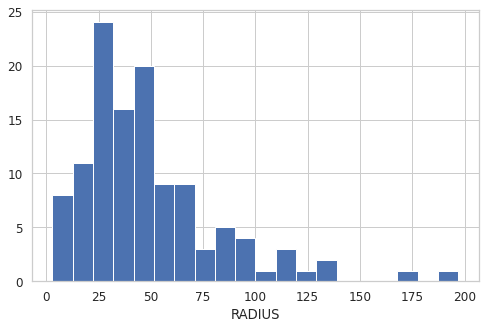

In [11]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    info_temp['RADIUS'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='RADIUS');

From the above KDE figure we can clearly understand that most of the images used in the dataset have a radius around the abnormality to be around 25 um surrounding the abnormality.

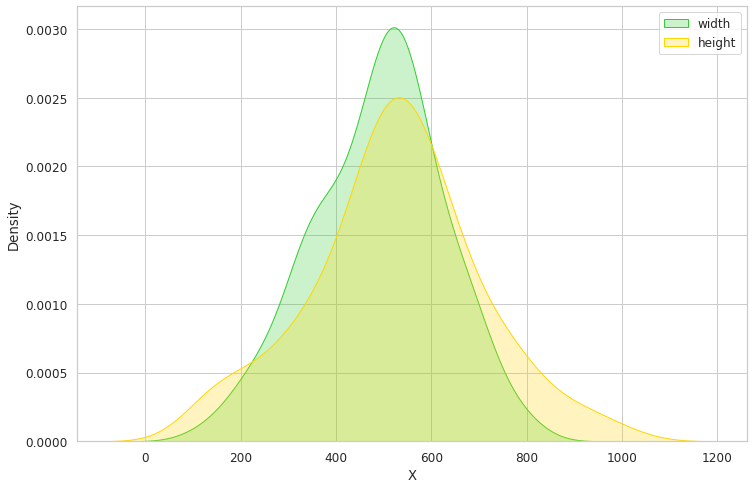

In [12]:
plt.figure(figsize=(12,8))
sns.kdeplot(info['X'], shade=True, color='limegreen')
sns.kdeplot(info['Y'], shade=True, color='gold')
plt.legend(['width','height'])

Upon analysing the above graph we understand the average sizing of the cancer mass is about 550.0
With it being approximately a bell curve, we can understand that data taken is of a normal distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


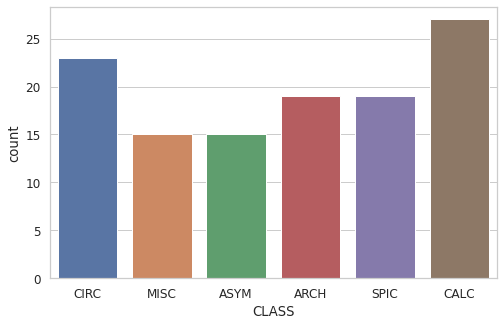

In [13]:
sns.countplot(info_temp['CLASS']);

We can clearly observe 6 different types of classes in breast cancer.

The class of abnormality present in breast cancer includes various types, as listed below:

1. Calcification: The presence of small calcium deposits within breast tissue, which can be detected on mammograms. Calcifications can be clustered or scattered.

2. Well-defined/circumscribed masses: Abnormal masses in the breast with well-defined borders or margins. These masses are typically round or oval-shaped and may appear as lumps during a physical examination or on imaging scans.

3. Spiculated masses: Masses with irregular, spiky projections or lines radiating from the center. Spiculated masses often indicate a more aggressive or invasive form of breast cancer.

4. Ill-defined masses: Masses with poorly defined or indistinct borders. These masses may appear blurred or hazy on imaging scans, making it challenging to determine the exact extent of the abnormality.

5. Architectural distortion: Distortion or disruption of the normal breast tissue structure. This can manifest as irregular or distorted shapes, asymmetry, or pulling of nearby tissue. Architectural distortion is often associated with underlying breast cancer.

6. Asymmetry: Significant differences or asymmetry between the appearance of the left and right breasts. While breast asymmetry can be normal, pronounced or new-onset asymmetry may require further investigation.

7. Normal: Indicates that there are no detectable abnormalities or signs of breast cancer in the breast tissue being evaluated.

**We can clearly observe that most of the dataset used contains images with calcification types of breast followed by CIRC which is well defined circumscribed masses.**

In [14]:
# from scipy.stats import gaussian_kde


# x_val = info_temp.X.values
# y_val = info_temp.Y.values

# # Calculate the point density
# xy = np.vstack([x_val,y_val])
# z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots(figsize = (10, 10))
# # ax.axis('off')
# ax.scatter(x_val, y_val, c=z, s=100, cmap='viridis')
# # ax.set_xlabel('x_mid')
# # ax.set_ylabel('y_mid')
# plt.show()

<AxesSubplot:xlabel='X', ylabel='Y'>

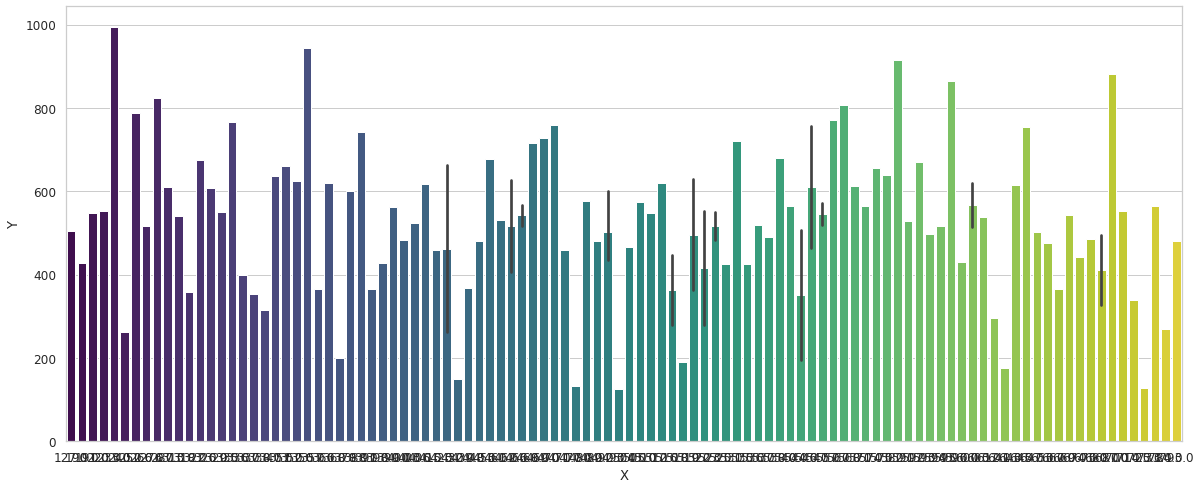

In [15]:
bins = 20
plt.figure(figsize=(20,8))
sns.barplot(data=info_temp, x="X", y="Y", palette='viridis')
#.plot.bar(rot=0, color=['deepskyblue', 'royalblue', 'deeppink'])

## Help with bins

In [16]:
info_temp[info_temp['SEVERITY'] == "M"].groupby('SEVERITY').count()

,REFNUM,BG,CLASS,X,Y,RADIUS
SEVERITY,,,,,,
M,51,51,51,51,51,51


<Figure size 864x576 with 0 Axes>

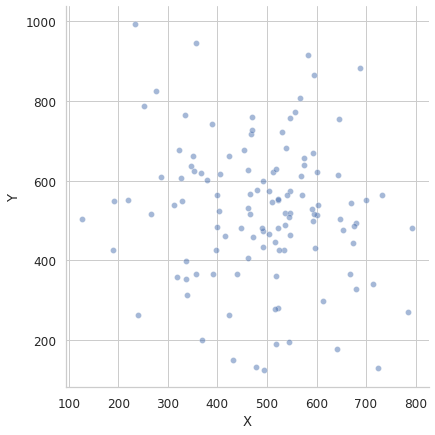

In [17]:
plt.figure(figsize=(12,8))
sns.relplot(data=info_temp, x="X", y="Y", sizes=(40, 400), alpha=.5, palette="viridis",height=6)
#.plot.bar(rot=0, color=['deepskyblue', 'royalblue', 'deeppink'])

From the above plot we understand the coordinates of the abnormality maximum is around 500x500 micrometers

<Figure size 864x576 with 0 Axes>

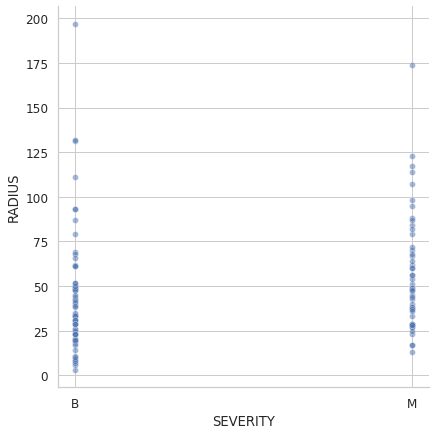

In [18]:
plt.figure(figsize=(12,8))
sns.relplot(x="SEVERITY", y="RADIUS", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=info_temp)

Understanding the severity of malignant and benign does not affect on the radius of the cancer spread throughout the breast.

<AxesSubplot:xlabel='SEVERITY', ylabel='count'>

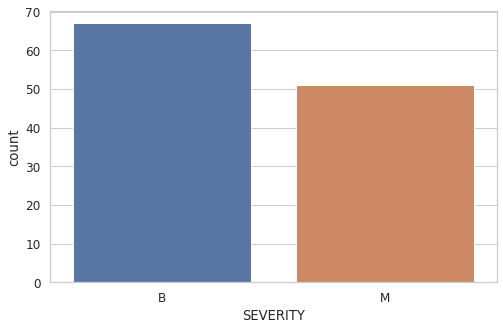

In [19]:
sns.countplot(data = info_temp, x = 'SEVERITY')

In [20]:
# B = 0
# M = 1
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,0,535.0,425.0,197.0
1,mdb002,G,CIRC,0,522.0,280.0,69.0
2,mdb005,F,CIRC,0,477.0,133.0,30.0
3,mdb010,F,CIRC,0,525.0,425.0,33.0
4,mdb012,F,CIRC,0,471.0,458.0,40.0
...,...,...,...,...,...,...,...
117,mdb274,F,MISC,1,127.0,505.0,123.0
118,mdb290,D,CIRC,0,337.0,353.0,45.0
119,mdb312,F,MISC,0,240.0,263.0,20.0
120,mdb314,F,MISC,0,518.0,191.0,39.0


In [21]:
label = info.SEVERITY
label = np.array(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

**Turning our outputs B-M to 1-0**

In [22]:
label =[]
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [23]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [24]:
img_name = np.array(img_name)

In [25]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


Text(0.5, 1.0, '0')

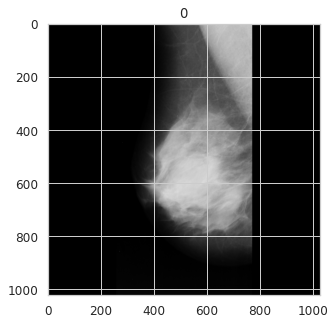

In [26]:
plt.imshow(cv2.imread(img_name[0]))
plt.title(label[0])

## view image random images

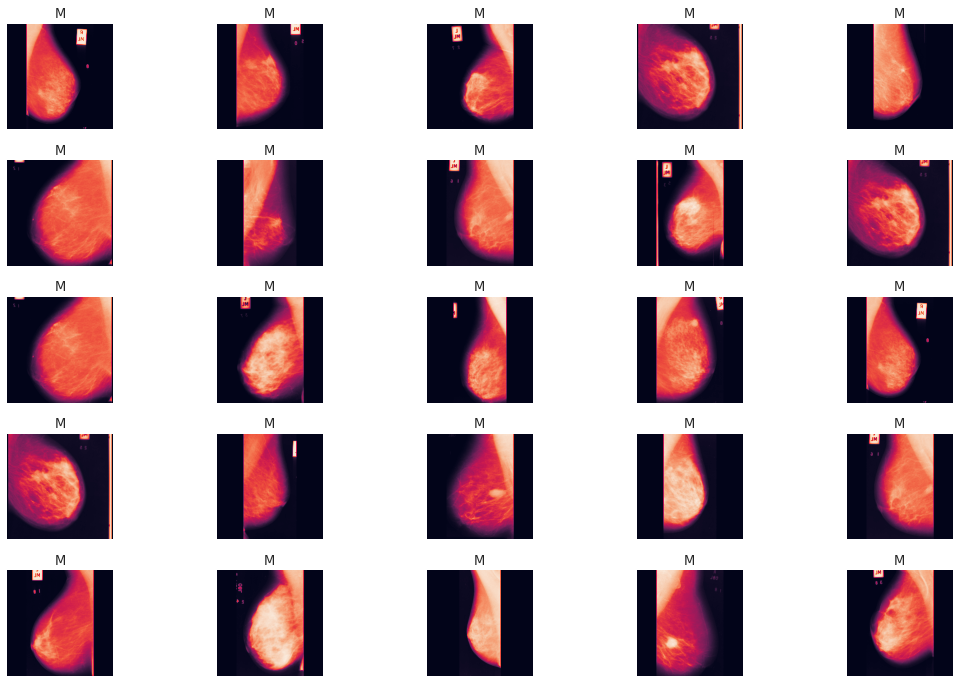

In [27]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

view_25_random_image()

In [28]:
from torchvision.io import read_image

In [29]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (30, 10)
def show_hist(gray, equ, categori, cdf1 = [], cdf2 = []):
    m = int(np.max(img))
    f = plt.figure(figsize=(15, 15))
    f.add_subplot(2, 2, 1, xticks = [], yticks=[]).set_title('Gray Image')
    plt.imshow(gray, cmap = 'gray')
    f.add_subplot(2, 2, 2).set_title('Histogram Gray Image')
    histogram, bin_edges = np.histogram(gray, bins=m+1, range=(0, m+1))
    plt.plot(bin_edges[:-1], histogram/np.max(histogram))
    if len(cdf1) > 0:
        plt.plot(cdf1, color = 'red')
    plt.xlabel('pixel')
    plt.ylabel('percent')
    
    f.add_subplot(2, 2, 3, xticks = [], yticks=[]).set_title(f'{categori}')
    plt.imshow(equ, cmap = 'gray')
    f.add_subplot(2, 2, 4).set_title(f'Histogram {categori}')
    histogram, bin_edges = np.histogram(equ, bins=256, range=(0, 256))
    plt.plot(bin_edges[:-1], histogram/np.max(histogram))
    if len(cdf2) > 0:
        plt.plot(cdf2, color = 'red')
    plt.xlabel('pixel')
    plt.ylabel('percent')
    plt.show()

In [30]:
def get_cdf(img):
    m = int(np.max(img))
    hist = np.histogram(img, bins=m+1, range=(0, m+1))[0]
    hist = hist/img.size
    cdf = np.cumsum(hist)
    return cdf

def histogram_equalization(img):
    m = int(np.max(img))
    hist = np.histogram(img, bins=m+1, range=(0, m+1))[0]
    hist = hist/img.size
    cdf = np.cumsum(hist)
    s_k = (255 * cdf)
    img_new = np.array([s_k[i] for i in img.ravel()]).reshape(img.shape)
    return img_new

In [31]:
gray2 = img
img_equ= histogram_equalization(gray2)
cdf1 = get_cdf(gray2)
cdf2 = get_cdf(img_equ)
show_hist(gray2, img_equ, 'Equalized with numpy', cdf1=cdf1, cdf2=cdf2)

NameError: name 'img' is not defined

In [ ]:
plt.imshow(img_equ, cmap='gray')

## read Images and labels. and augmentation of images

In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(0, 360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            last_label.append(label[i])
            
            #if label[i] == 1:
            #    last_label.append(1)
            #else:
            #    last_label.append(0)


In [ ]:
last_label = np.array(last_label)
last_label

## split train and test set

In [ ]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.25, random_state = 42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_train = np.reshape(x_train, (32940,224, 224, 1)) # 1 for gray scale
x_test = np.reshape(x_test, (10980,224, 224,1))

## Build a Model

Customised Model

In [ ]:
print(tf.__version__)

In [ ]:
# model = keras.Sequential([
#     VGG,
#     keras.layer.Flatten()
#     keras.layer.Dense(units=256, activation='relu'),
#     keras.layer.Dense(units=256, activation='relu'),
#     keras.layer.Dense(units=2, activation='softmax')
# ])

In [ ]:
# classifier = Sequential()
# classifier.add(Conv2D(32, (3,3), input_shape =(64, 64, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Flatten())
# classifier.add(Dense(units= 128, activation = 'relu'))
# classifier.add(Dense(units= 1, activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

* Convolution filters produce output images in which the brightness value at a given pixel is a function of some weighted average of the brightness of the surrounding pixels.
* Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map.
* Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition from the convolution layer to the full connected layer.
* Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. 

In [ ]:
# def custom_model():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 3)))
#     model.add(Conv2D(64, kernel_size=(3,3),activation='sigmoid', input_shape=(64, 64, 1)))
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Conv2D(32, kernel_size=(3,3),activation='sigmoid'))
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(128, activation = 'relu'))
#     #model.layers
#     return model
# # weights to be added to fine tune the model to retrive a better accuracy than 91.83%

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

In [ ]:
# model = custom_model()
# model.summary()

## Customising previous model with weights in order to fine tune

In [ ]:
# class SubclassModel(tf.keras.Model):

#   def __init__(self, name=None):
#     super().__init__(name=name)
#     self.d1 = tf.keras.layers.Dense(10)
#     self.d2 = tf.keras.layers.Dense(20)

#   def call(self, inputs):
#     x = self.d1(inputs)
#     return self.d2(x)

# model = SubclassModel()
# model(tf.zeros((10, 10)))
# weight_paths = model.get_weight_paths()
# # weight_paths:
# # {
# #    'd1.kernel': model.d1.kernel,
# #    'd1.bias': model.d1.bias,
# #    'd2.kernel': model.d2.kernel,
# #    'd2.bias': model.d2.bias,
# # }

# # Functional model
# inputs = tf.keras.Input((10,), batch_size=10)
# x = tf.keras.layers.Dense(20, name='d1')(inputs)
# output = tf.keras.layers.Dense(30, name='d2')(x)
# model = tf.keras.Model(inputs, output)
# d1 = model.layers[1]
# d2 = model.layers[2]
# weight_paths = model.get_weight_paths()
# # weight_paths:
# # {
# #    'd1.kernel': d1.kernel,
# #    'd1.bias': d1.bias,
# #    'd2.kernel': d2.kernel,
# #    'd2.bias': d2.bias,
# # }

In [ ]:
# load_weights(
#     filepath, skip_mismatch=False, by_name=False, options=None
# )

## Define Callbacks

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])

In [ ]:
y_test = np.array(y_test)
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

## Let's Visualize our result

In [ ]:

def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [ ]:
predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
len(last_label)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#roc plot for specific class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANNROC')
plt.legend(loc="lower right")
plt.show()